# Plots for 10/05/2018 Presentation
---
This notebook generates the plots for the slide deck presented to Nathan on 10/05/2018

In [1]:
import sys
sys.path.append("../")
sys.path.append("../../process")

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import transferdata as td
from analyze_pg import AnalyzePG as apg
import plot_set
from westernintnet.westernintnet import win_data

Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading
Use  C:\Users\brdo\scenario_data\  to save/load local scenario data.


In [3]:
od = td.OutputData()

Use  C:\Users\brdo\scenario_data\  to save/load local scenario data.


In [4]:
win_data.read_demand_data('v2')
win_data.read_solar_data('naive')
win_data.read_wind_data()

multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)

Load demand data
Load solar data
Load wind data


## Stacked Plots

In [5]:
pg = od.get_data('western_scenarioBaseCase01', 'PG')

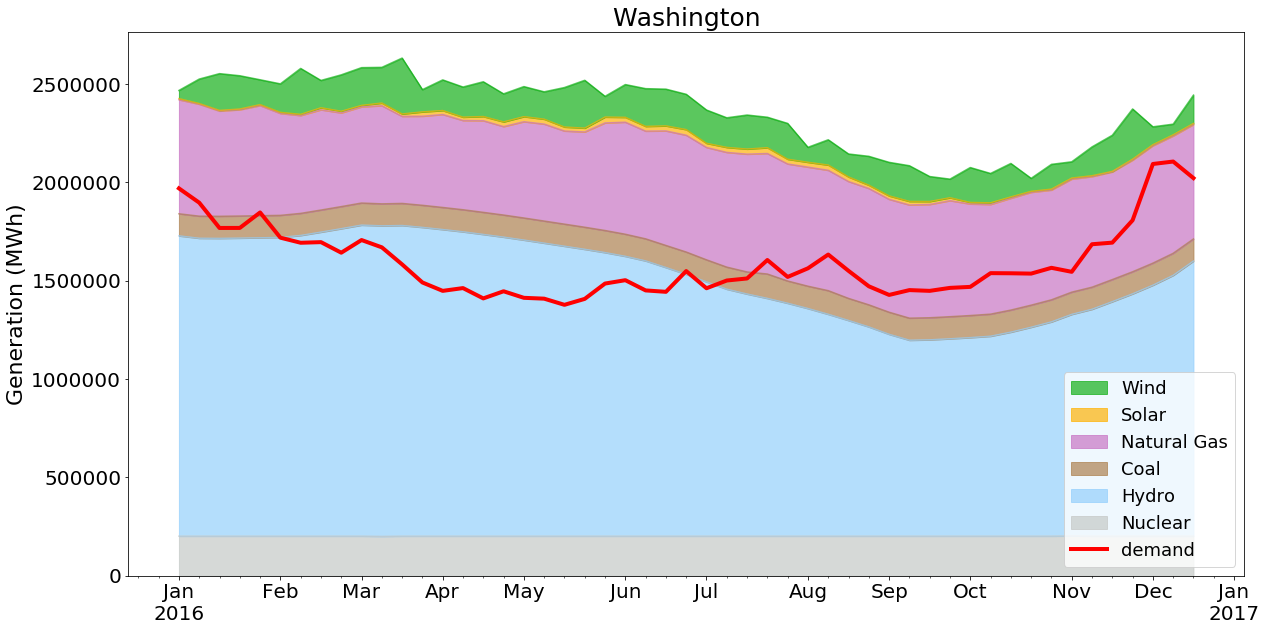

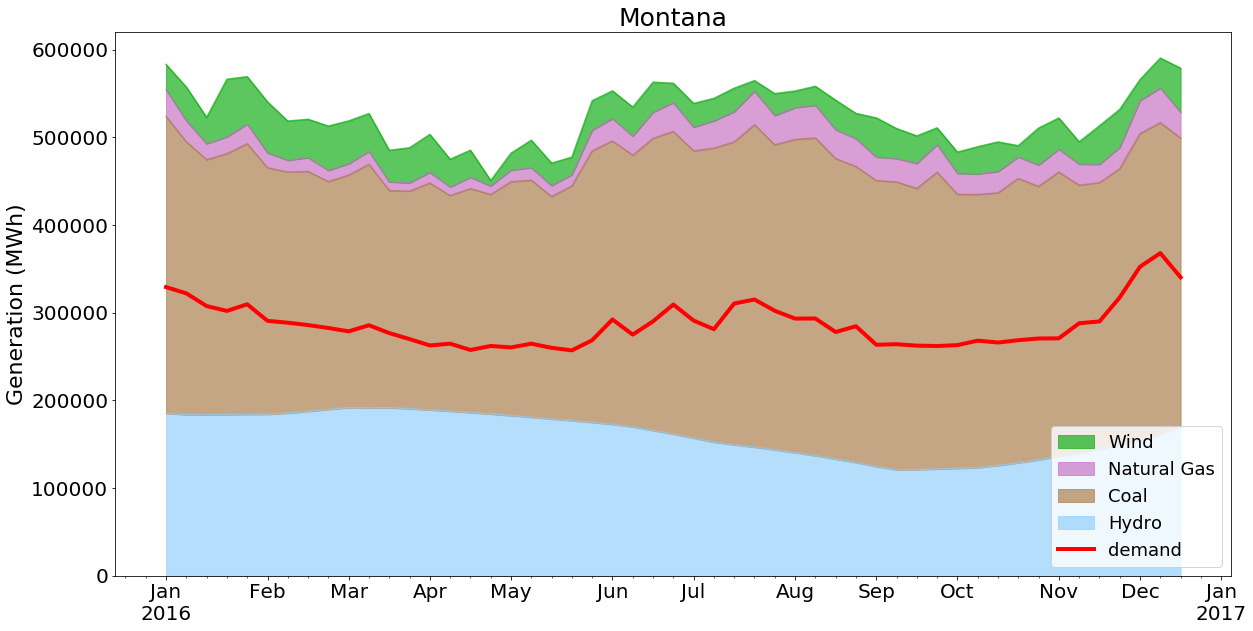

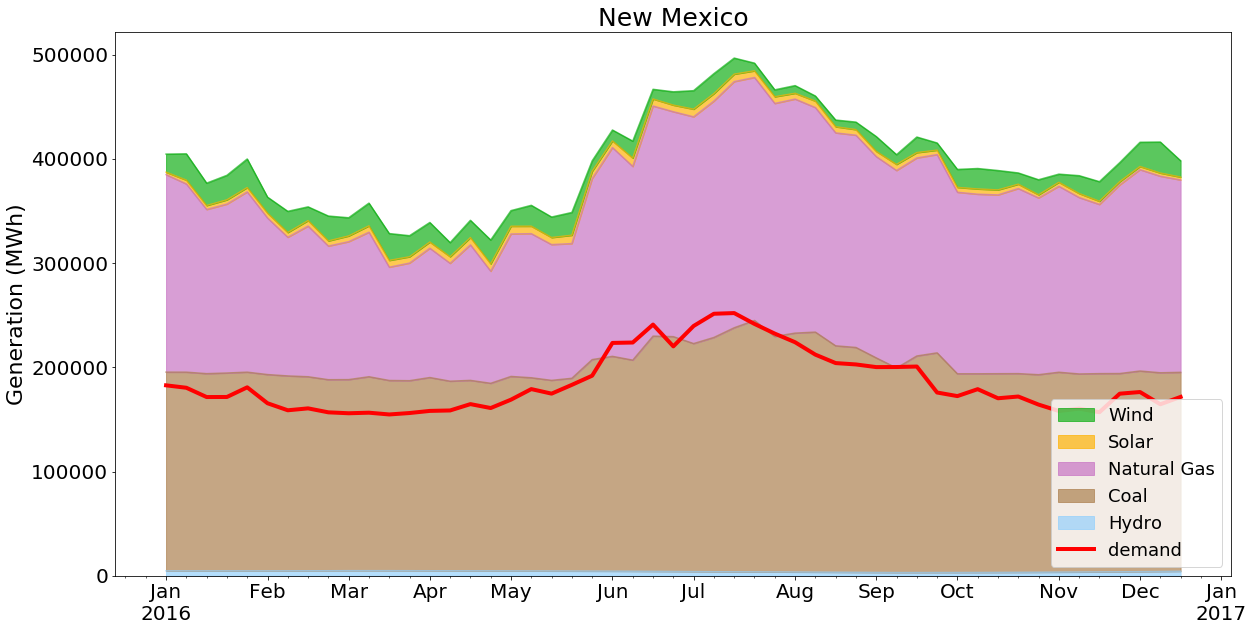

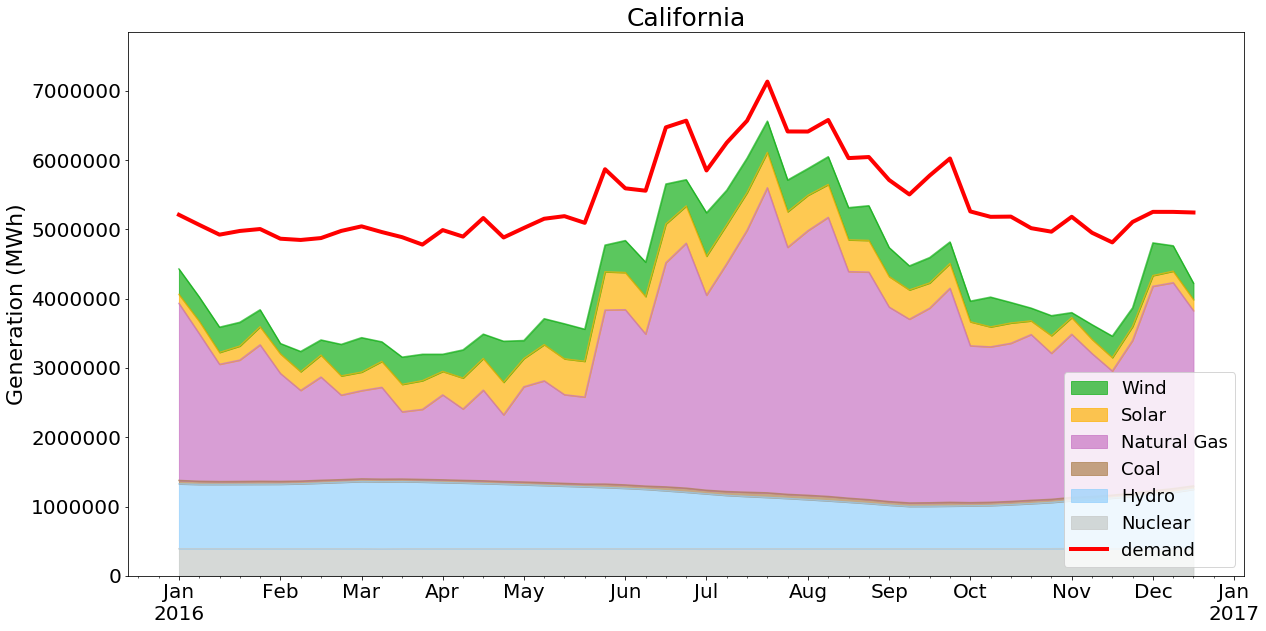

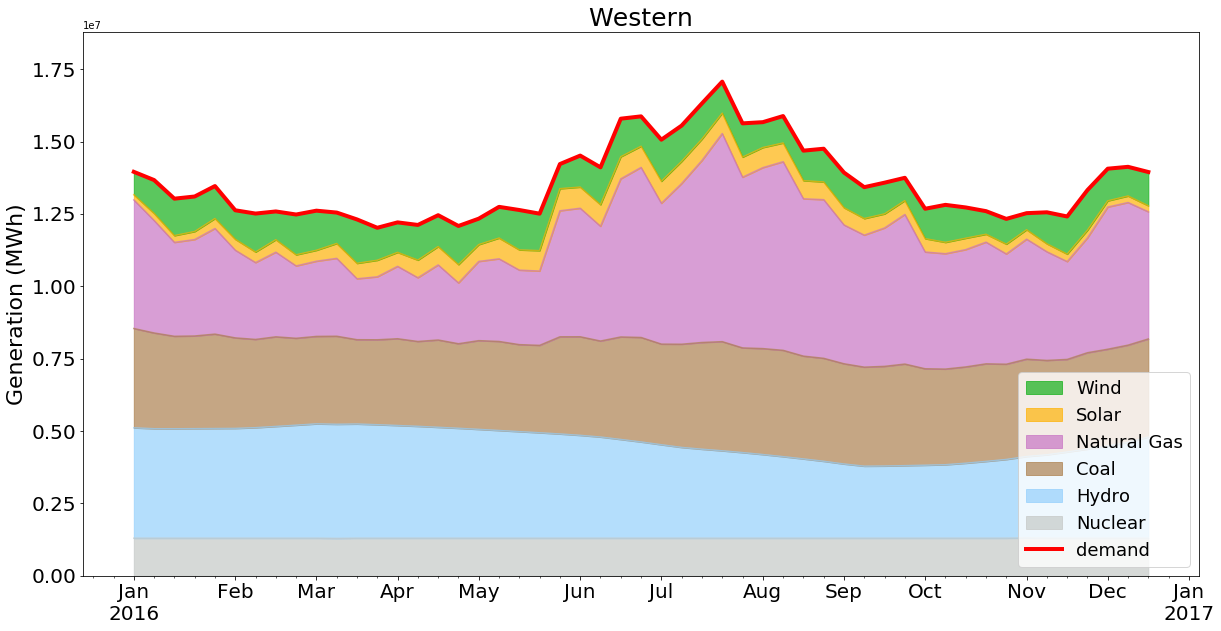

2016 Generation in TWh:
Washington: 201.600
Montana: 41.382
New Mexico: 29.669
California: 494.205
Western: 1383.660


In [6]:
stack = apg((pg, win_data, multiplier),
            ('2016-01-01-00', '2016-12-31-23', 'local', 'W'),
            ['Washington', 'Montana', 'New Mexico', 'California', 'Western'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print("2016 Generation in TWh:")
for z in ['Washington', 'Montana', 'New Mexico', 'California', 'Western']:
    print('%s: %.3f' % (z, data_stack[z].sum().sum()/10**6))

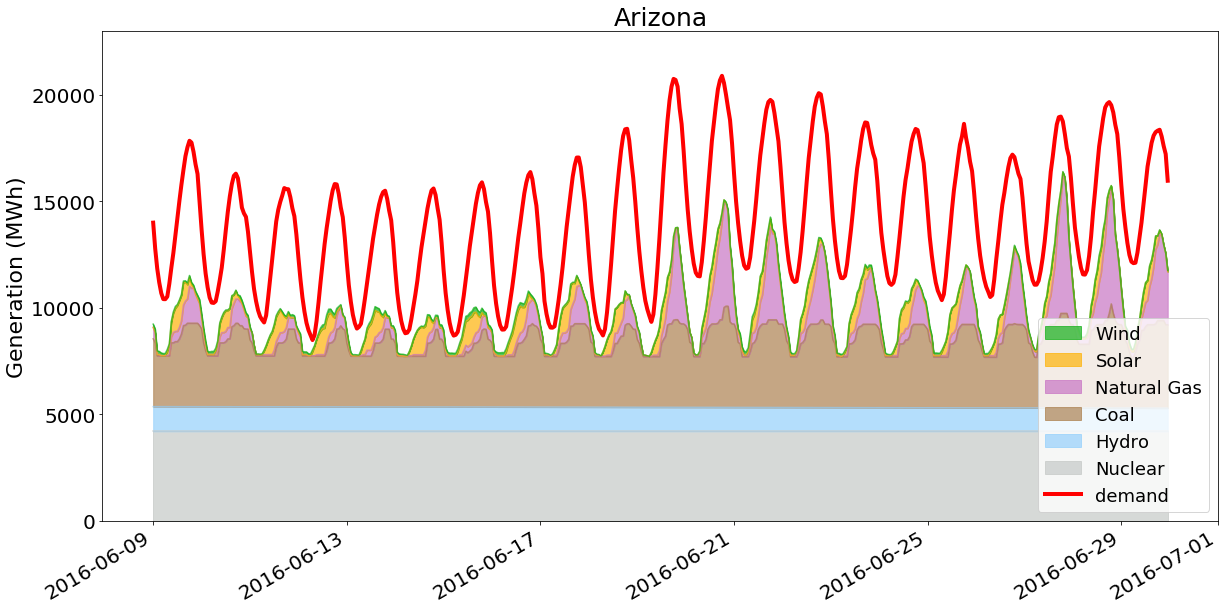

Generation: 12.072 TWh


In [7]:
stack = apg((pg, win_data, multiplier),
            ('2016-06-09-00', '2016-06-29-23', 'local', 'H'),
            ['Arizona'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print('Generation: %.3f TWh' % (data_stack['Arizona'].sum().sum()/10**6))

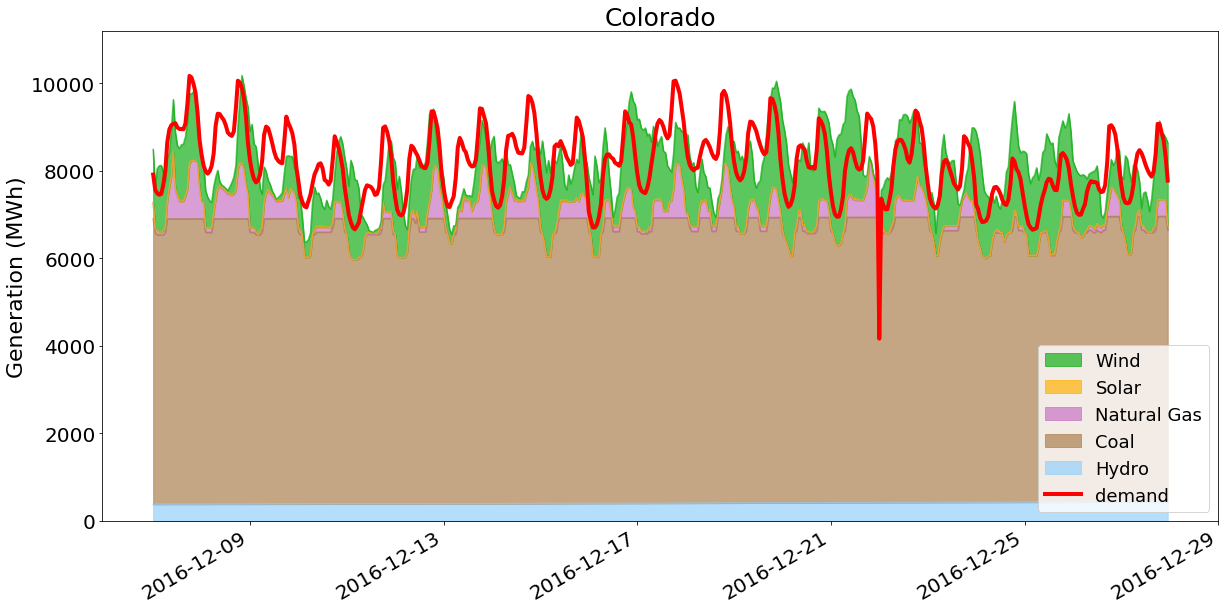

Generation: 8.250 TWh


In [8]:
stack = apg((pg, win_data, multiplier),
            ('2016-12-07-00', '2016-12-27-23', 'local', 'H'),
            ['Colorado'],
            ['nuclear', 'coal', 'ng', 'hydro', 'wind', 'solar'],
            'stacked', normalize=False)
stack.get_plot(save=False)
data_stack = stack.get_data()
print('Generation: %.3f TWh' % (data_stack['Colorado'].sum().sum()/10**6))

## Solar and Wind Power Generated in California

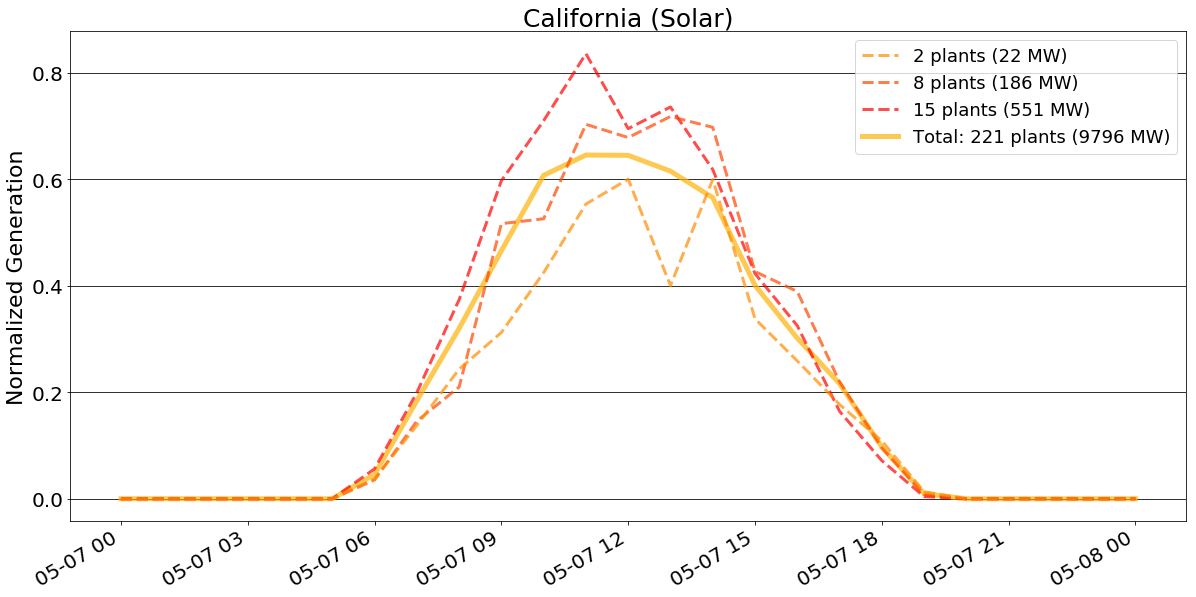

In [9]:
apg((pg, win_data, multiplier),
    ('2016-05-07-00', '2016-05-08-00', 'local', 'H'),
    ['California'],
    ['solar'],
    'variability', normalize=True, seed=4).get_plot(save=False)

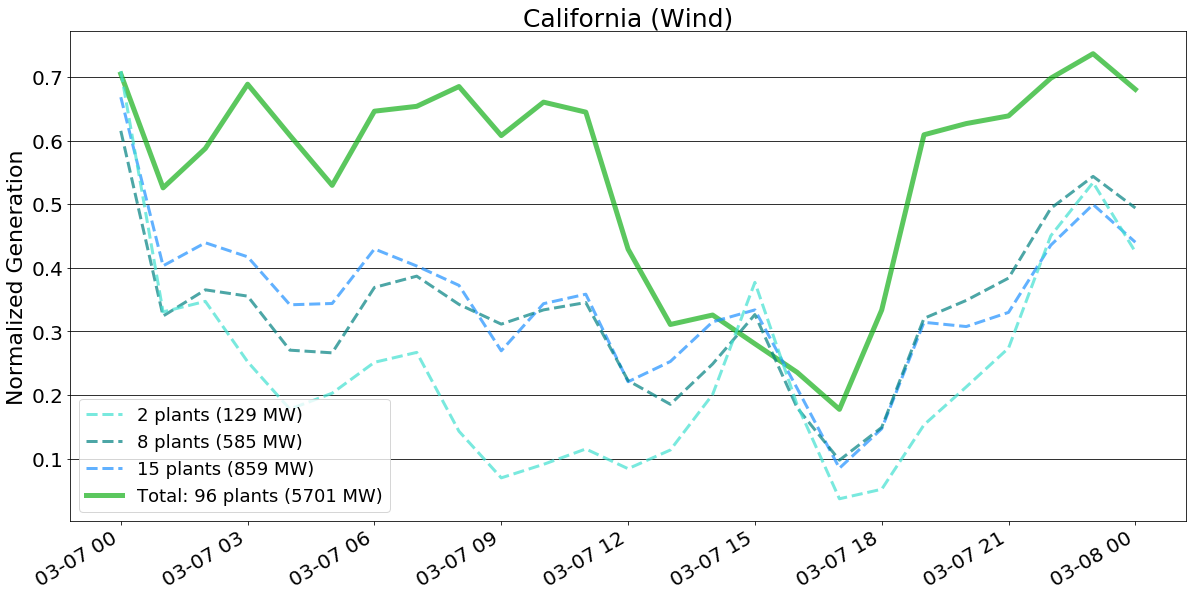

In [10]:
apg((pg, win_data, multiplier),
    ('2016-03-07-00', '2016-03-08-00', 'local', 'H'),
    ['California'],
    ['wind'],
    'variability', normalize=True, seed=4).get_plot(save=False)

## Solar Power Generated by Zone

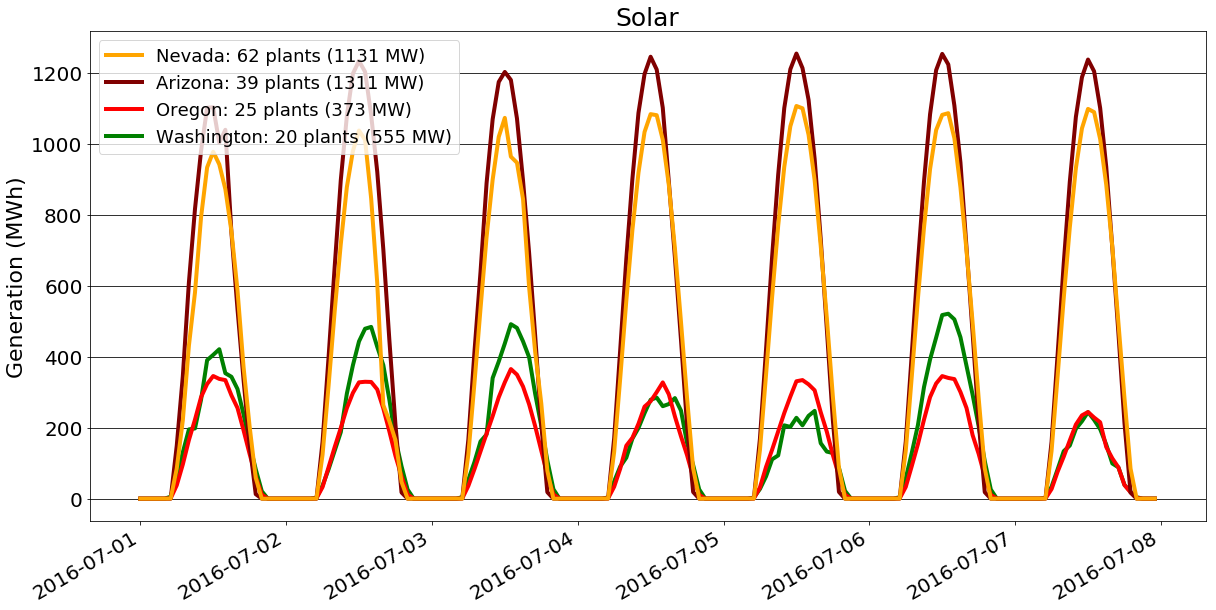

In [11]:
apg((pg, win_data, multiplier),
    ('2016-07-01-00', '2016-07-07-23', 'US/Pacific', 'H'),
    ['Washington', 'Oregon', 'Arizona', 'Nevada'],
    ['solar'],
    'comp', normalize=False).get_plot(save=False)

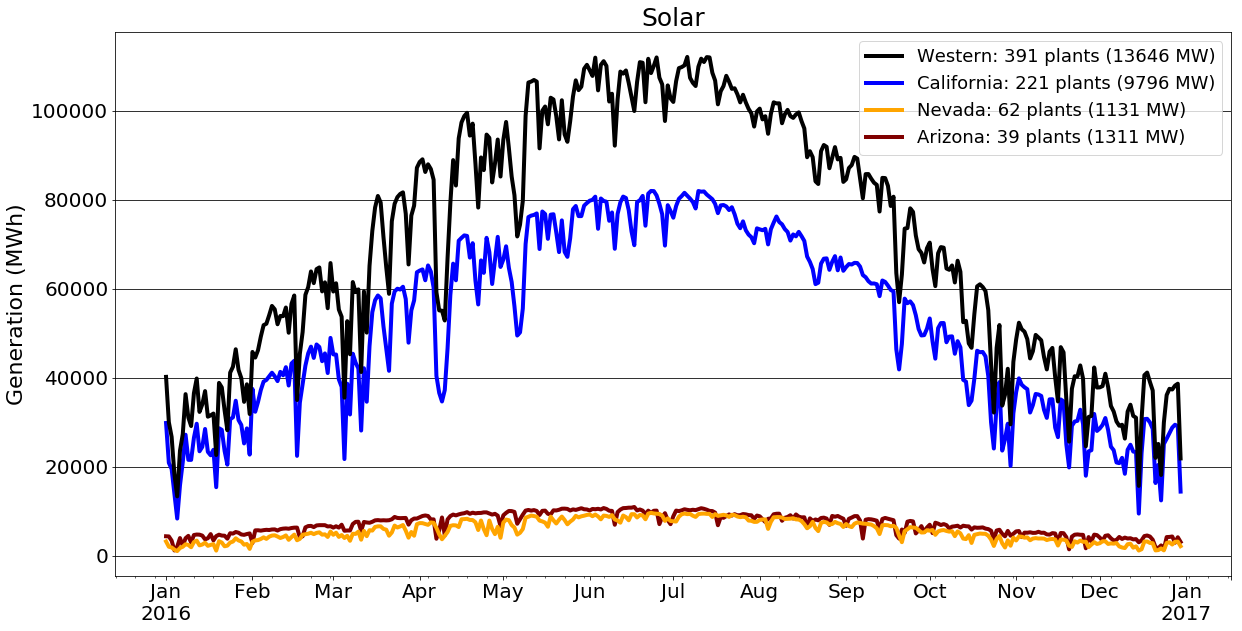

In [12]:
apg((pg, win_data, multiplier),
    ('2016-01-01-00', '2016-12-31-23', 'US/Pacific', 'D'),
    ['Arizona', 'Nevada', 'California', 'Western'],
    ['solar'],
    'comp', normalize=False).get_plot(save=False)

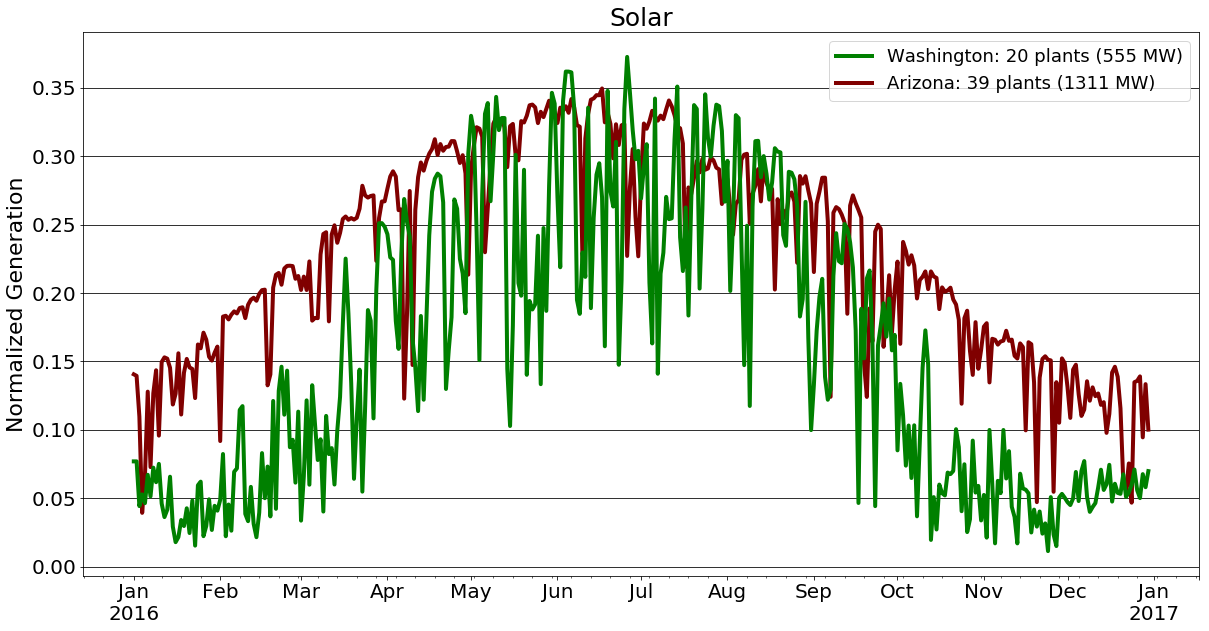

In [13]:
apg((pg, win_data, multiplier),
    ('2016-01-01-00', '2016-12-31-23', 'US/Pacific', 'D'),
    ['Arizona', 'Washington'],
    ['solar'],
    'comp', normalize=True).get_plot(save=False)

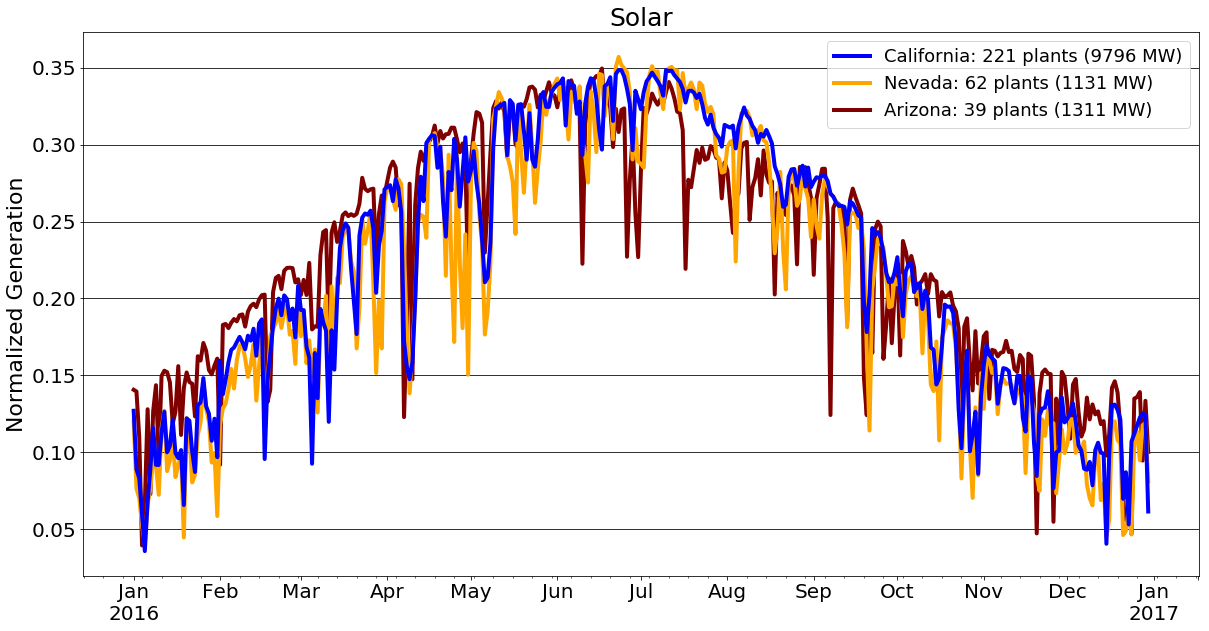

In [14]:
apg((pg, win_data, multiplier),
    ('2016-01-01-00', '2016-12-31-23', 'US/Pacific', 'D'),
    ['Arizona', 'Nevada', 'California'],
    ['solar'],
    'comp', normalize=True).get_plot(save=False)

## Wind Power Generated by Zone

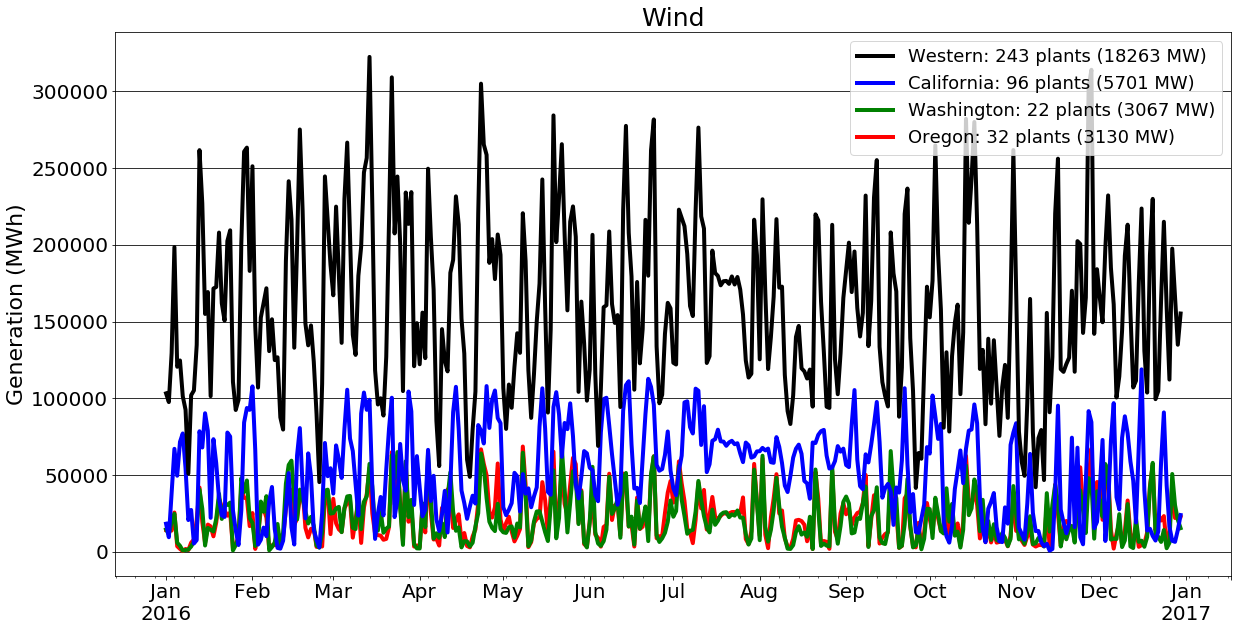

In [15]:
apg((pg, win_data, multiplier),
    ('2016-01-01-00', '2016-12-31-23', 'US/Pacific', 'D'),
    ['Oregon', 'Washington', 'California', 'Western'],
    ['wind'],
    'comp', normalize=False).get_plot(save=False)

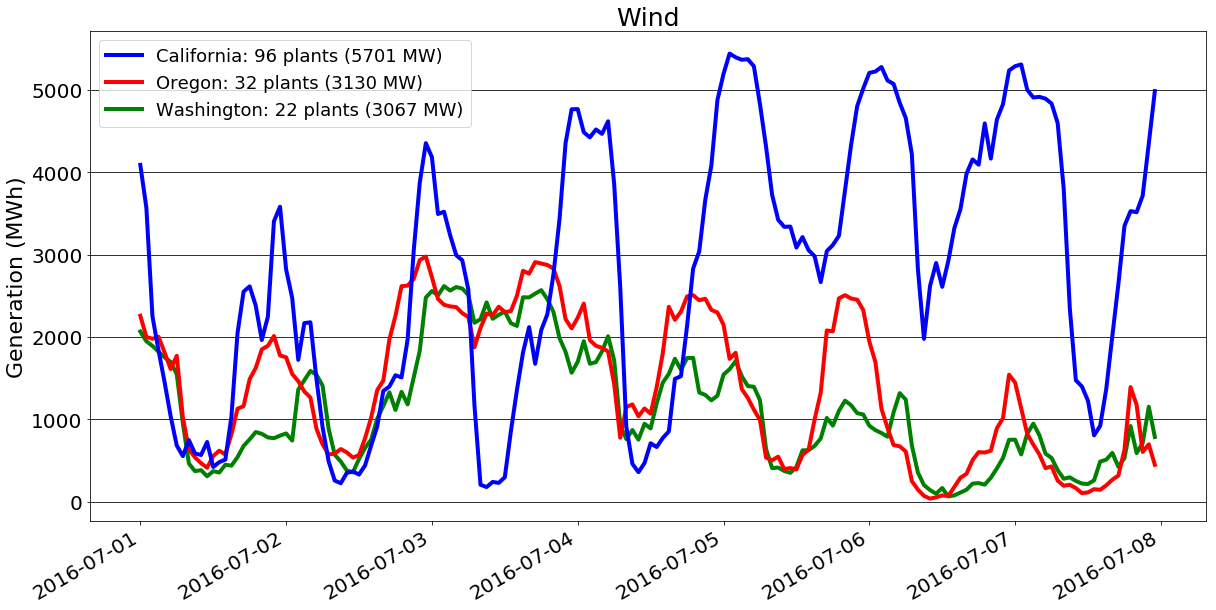

In [16]:
apg((pg, win_data, multiplier),
    ('2016-07-01-00', '2016-07-07-23', 'US/Pacific', 'H'),
    ['Washington', 'Oregon', 'California'],
    ['wind'],
    'comp', normalize=False).get_plot(save=False)

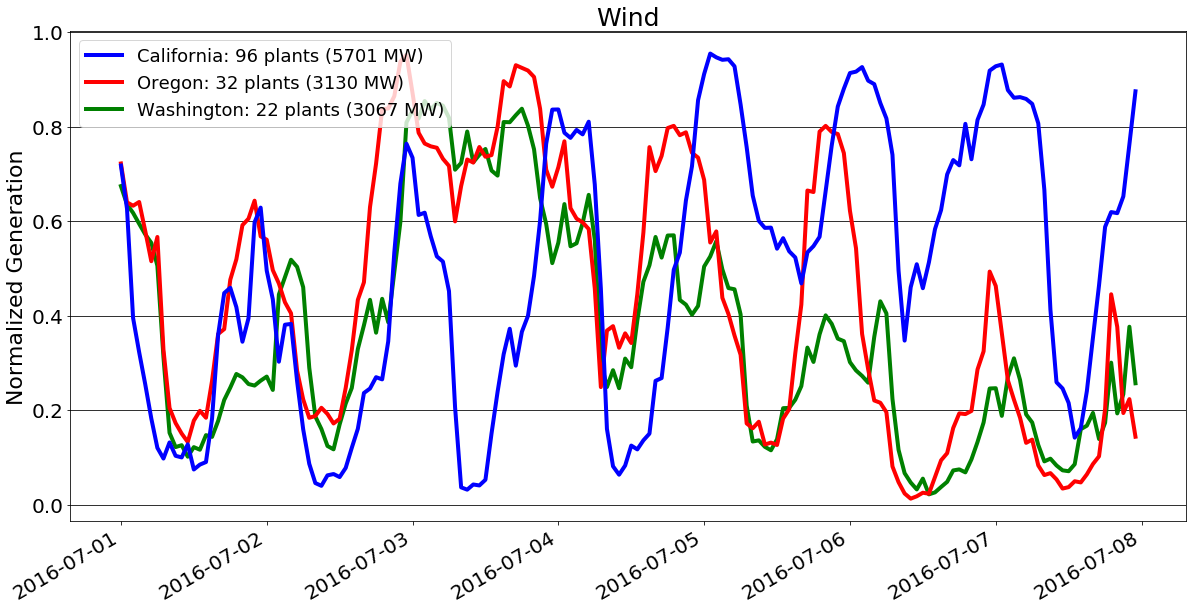

In [17]:
apg((pg, win_data, multiplier),
    ('2016-07-01-00', '2016-07-07-23', 'US/Pacific', 'H'),
    ['Washington', 'Oregon', 'California'],
    ['wind'],
    'comp', normalize=True).get_plot(save=False)

## California Scenarios Comparison

In [18]:
scenarios_ca = {
    'x1': ['western_scenarioBaseCase01', 'western_scenarioCAEnhancedGrid'],
    'x2': ['western_scenarioCARenX2corr', 'western_scenarioCAEnhancedGridRenX2'],
    'x3': ['western_scenarioCARenX3', 'western_scenarioCAEnhancedGridRenX3'],
    'x4': ['western_scenarioCARenX4', 'western_scenarioCAEnhancedGridRenX4']}

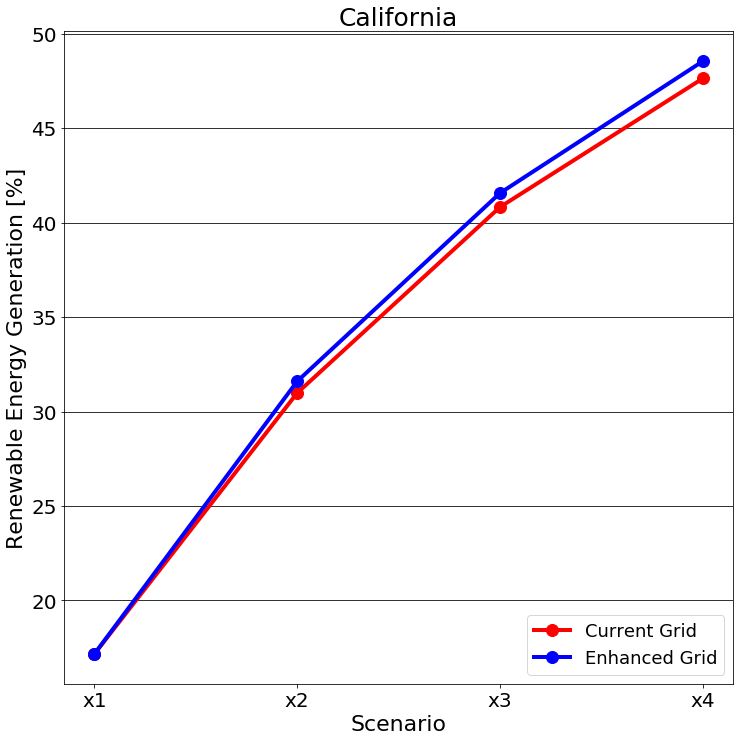

In [19]:
plot_set.fraction_renewable(scenarios_ca, 'California')

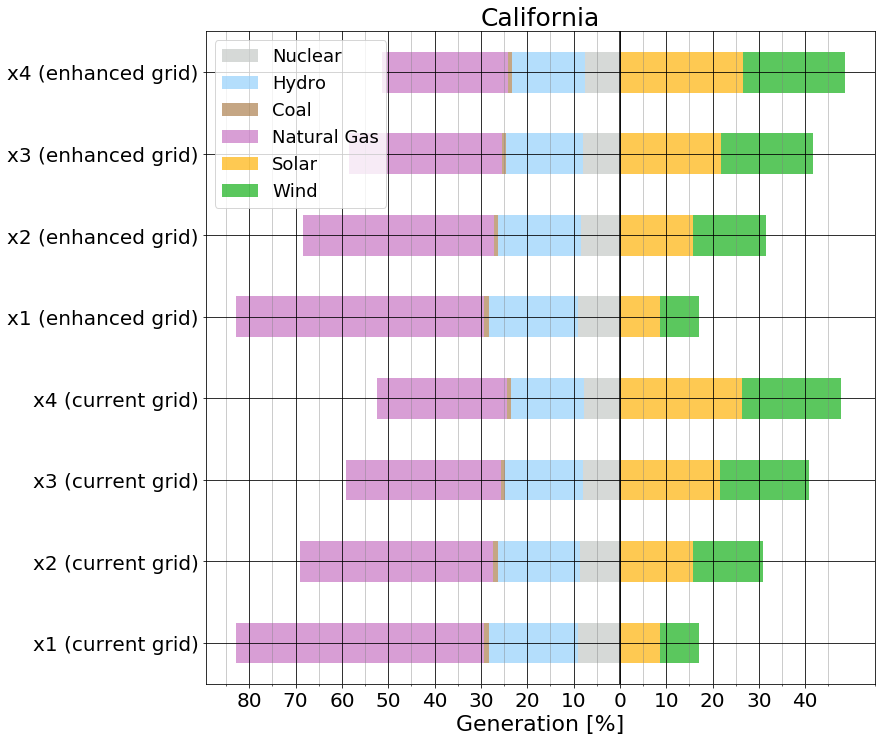

     nuclear     hydro        coal        ng      solar       wind
0  0.0915843  0.191439   0.0112166  0.534201  0.0854255  0.0861335
1  0.0853943  0.178508  0.00981461  0.416473   0.158338   0.151472
2  0.0802816  0.167632  0.00881414     0.335   0.216518   0.191754
3  0.0765419  0.159443  0.00812296  0.279474   0.262897   0.213521
4   0.091579  0.191428   0.0112162  0.534227  0.0854207  0.0861286
5  0.0849727  0.177629  0.00972108  0.411686   0.158383   0.157608
6   0.079803  0.166605  0.00872422  0.329195   0.218789   0.196884
7  0.0758666  0.157899   0.0080023  0.272713   0.265303   0.220217


In [20]:
data_stack_ca = plot_set.stack(scenarios_ca, 'California')
print(data_stack_ca)

## Western Scenarios Comparison

In [21]:
scenarios_west = {
    'x1': ['western_scenarioBaseCase01', 'western_scenarioEnhancedGrid'],
    'x2': ['western_scenarioRenX2_01', 'western_scenarioEnhancedGridRenX2'],
    'x3': ['western_scenarioRenX3_01', 'western_scenarioEnhancedGridRenX3'],
    'x4': ['western_scenarioRenX4_01', 'western_scenarioEnhancedGridRenX4']}

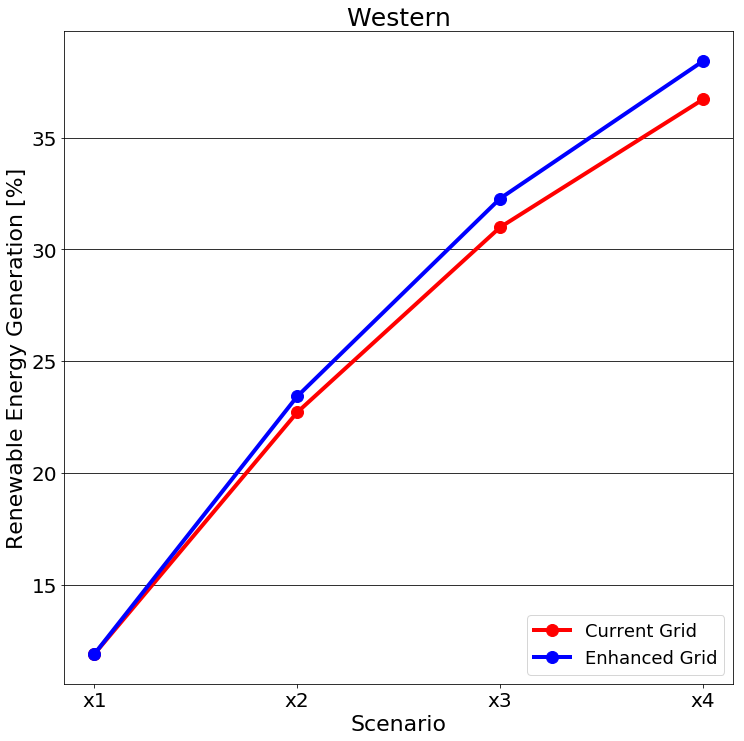

In [22]:
plot_set.fraction_renewable(scenarios_west, 'Western')

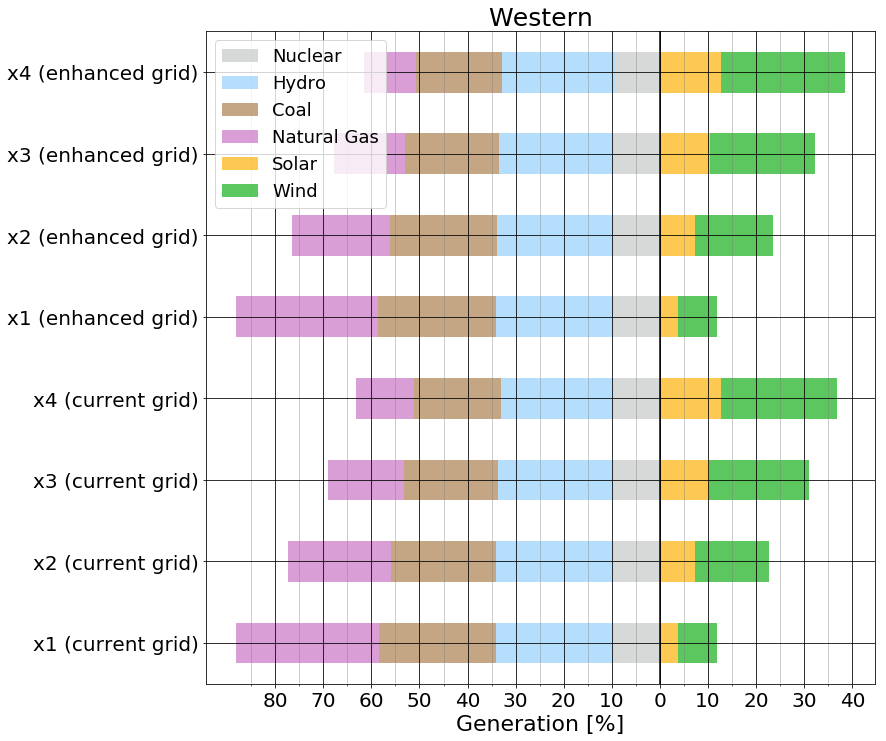

     nuclear     hydro      coal        ng      solar       wind
0  0.0957222  0.244782   0.24302  0.297586  0.0365008  0.0823886
1  0.0955973  0.244331  0.218706  0.214262  0.0721974   0.154905
2  0.0951488  0.241423  0.195425  0.158068   0.102851   0.207085
3  0.0946062  0.236361   0.18021  0.121652   0.126683   0.240487
4  0.0957222  0.244782  0.245051  0.295555  0.0365008  0.0823892
5  0.0955614  0.244164  0.220772  0.205263  0.0725411   0.161698
6  0.0950196  0.240292  0.195709  0.146167   0.104151   0.218662
7  0.0943942   0.23397  0.178805  0.108525   0.127772   0.256534


In [23]:
data_stack_west = plot_set.stack(scenarios_west, 'Western')
print(data_stack_west)

## Impact of Upgrading California on Other Zones

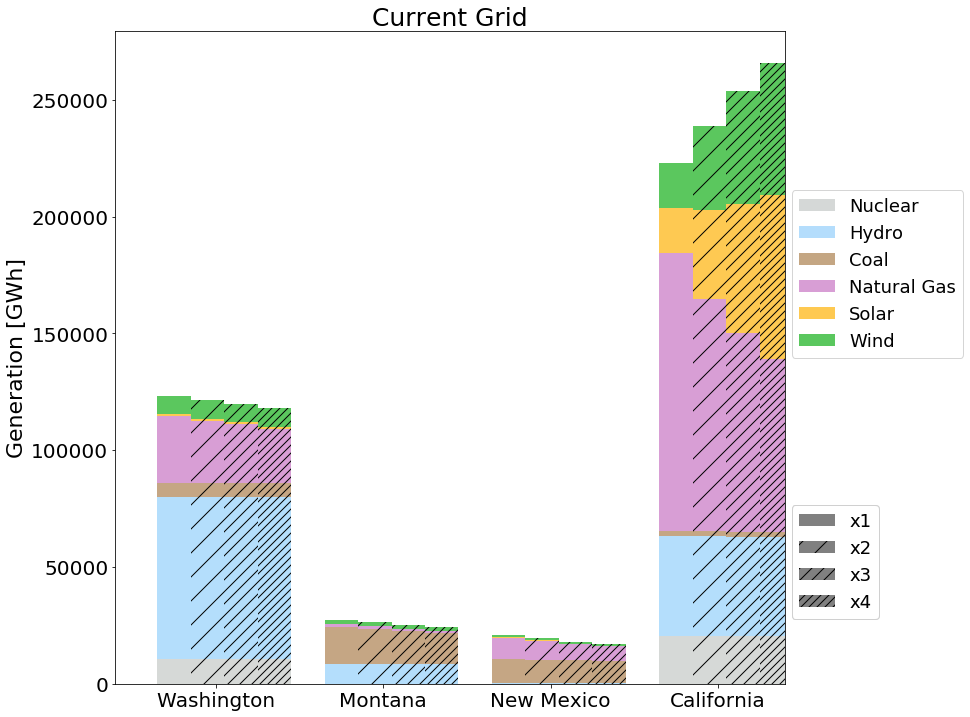

            nuclear    hydro     coal       ng    solar     wind
Washington  10540.8  69575.9  5903.32    28570  764.771  8027.06
Montana         NaN  8442.69  16069.1  1226.64      NaN  1766.15
New Mexico      NaN  216.605  10354.1  9022.86  275.679  843.742
California  20405.2  42653.2  2499.08   119021    19033  19190.8
            nuclear    hydro     coal       ng    solar     wind
Washington  10540.1  69575.6  5891.58  26683.5  764.739  8027.01
Montana         NaN  8442.68  15187.6  1056.17      NaN  1766.13
New Mexico      NaN  216.547  10100.5  8076.48  275.679  843.731
California  20403.7  42651.9  2345.06  99510.2  37832.5  36192.1
            nuclear    hydro     coal       ng    solar     wind
Washington  10531.7  69526.4  5885.32  25153.8  761.242  8014.63
Montana         NaN  8434.26  14156.2  916.276      NaN  1765.05
New Mexico      NaN  216.086  9805.36  6860.19  274.743  842.873
California  20386.7  42568.3  2238.26  85069.8  54982.7  48694.1
            nuclear    hy

In [24]:
zones = ['Washington', 'Montana', 'New Mexico']
data_impact = plot_set.impact(scenarios_ca, 'California', zones, 0)
for df in data_impact:
    print(df.head(n=len(zones)+1))

## Correlation for Renewable

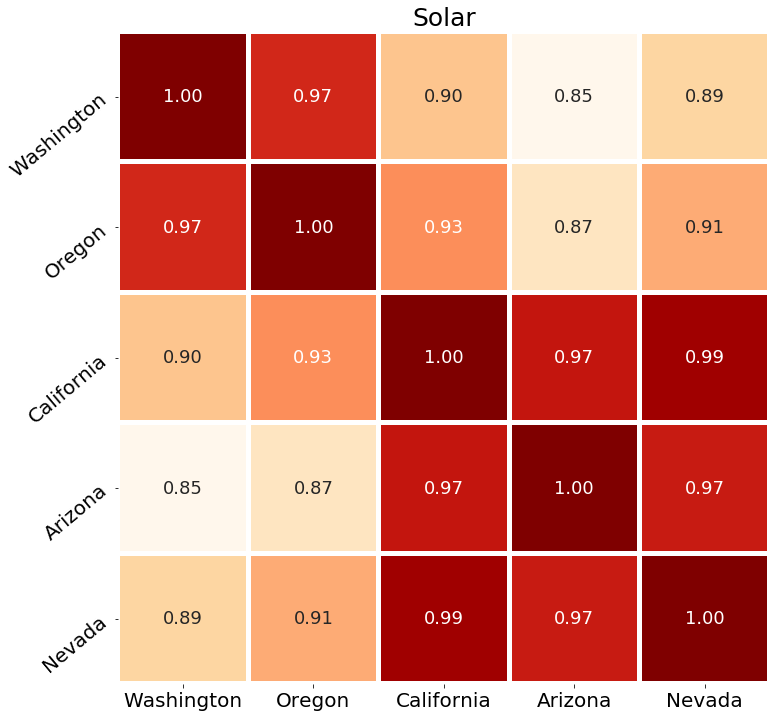

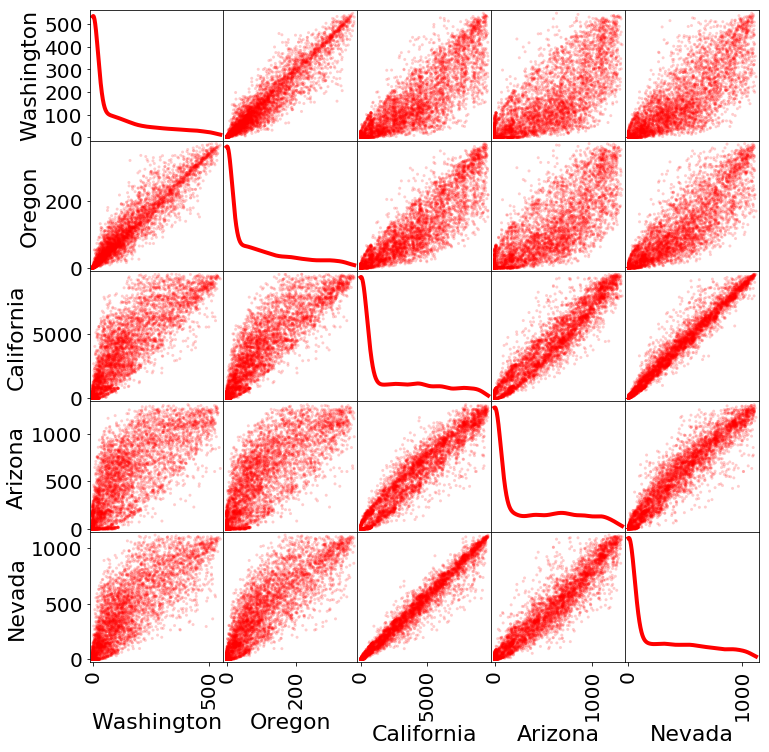

            Washington    Oregon  California   Arizona    Nevada
Washington    1.000000  0.965907    0.899538  0.850804  0.886569
Oregon        0.965907  1.000000    0.925330  0.872510  0.913486
California    0.899538  0.925330    1.000000  0.973098  0.988207
Arizona       0.850804  0.872510    0.973098  1.000000  0.970440
Nevada        0.886569  0.913486    0.988207  0.970440  1.000000


In [25]:
corr_solar = apg((pg, win_data, multiplier),
                 ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
                 ['Washington', 'Oregon', 'California', 'Arizona', 'Nevada'],
                 ['solar'],
                 'correlation')
corr_solar.get_plot(save=False)
print(corr_solar.get_data()['solar'].corr())

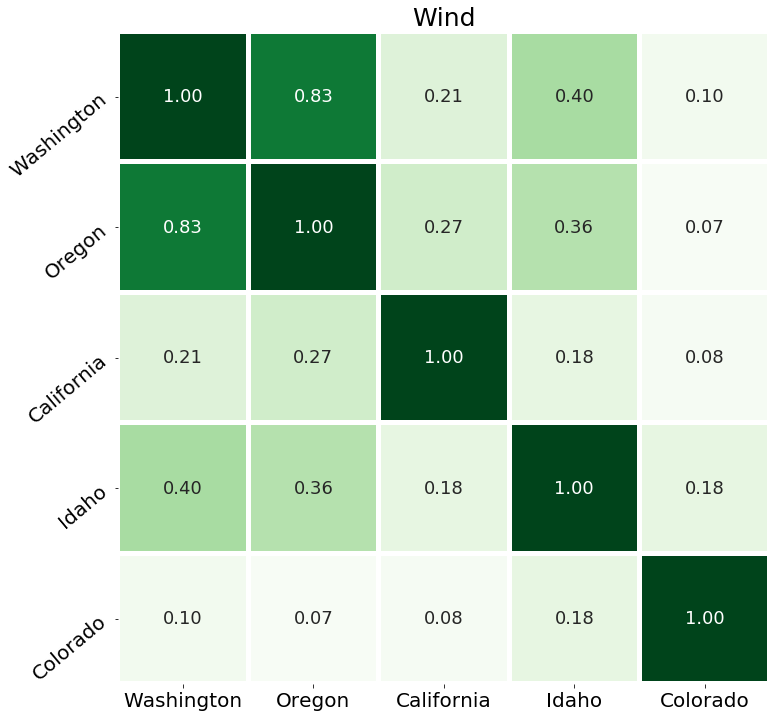

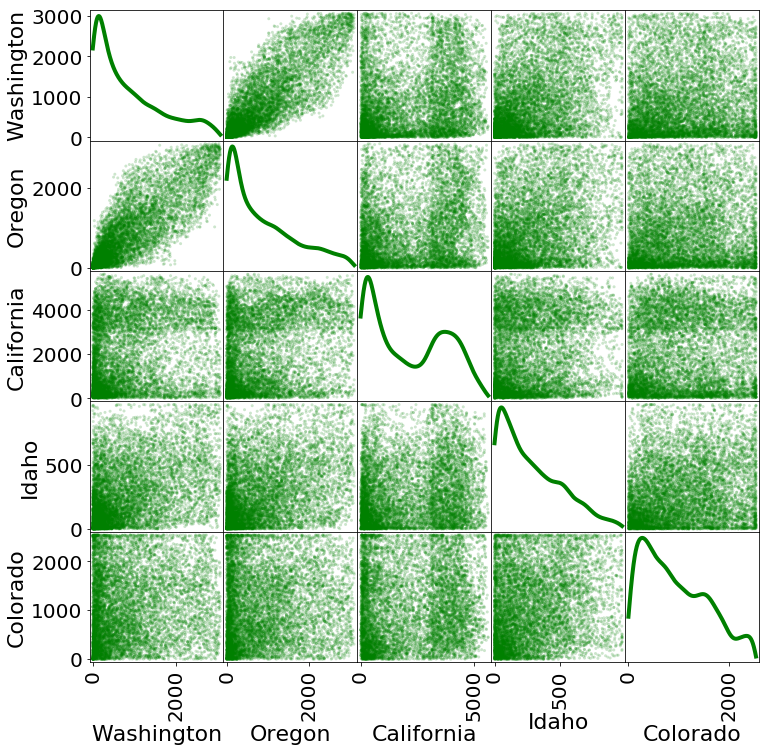

            Washington    Oregon  California     Idaho  Colorado
Washington    1.000000  0.833675    0.213932  0.401380  0.104864
Oregon        0.833675  1.000000    0.269699  0.361422  0.071854
California    0.213932  0.269699    1.000000  0.179846  0.082959
Idaho         0.401380  0.361422    0.179846  1.000000  0.180177
Colorado      0.104864  0.071854    0.082959  0.180177  1.000000


In [26]:
corr_wind = apg((pg, win_data, multiplier),
                 ('2016-01-01-00', '2016-12-31-23', 'utc', 'H'),
                 ['Washington', 'Oregon', 'California', 'Idaho', 'Colorado'],
                 ['wind'],
                 'correlation')
corr_wind.get_plot(save=False)
print(corr_wind.get_data()['wind'].corr())